# Basic Linear Regression

- [Exploring covariance vs correlation](#Covariance-vs-Correlation)
- [Visualizing relationships between variables](#Visualizing-Relationship-between-Variables)
- [Baseline linear regression model](#Baseline-Model)
- [Model iteration](#Model-Iteration)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

In [2]:
df = pd.read_csv('../data/life-expectancy.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
df.columns = [col.strip().replace(' ', '_').lower() for col in df.columns]
df.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


### Covariance vs Correlation

Covariance and correlation both help us investigate the relationship between variables. 

- Covariance tells us how two variables "vary" together. Not the strength of relationship
- Correlation is always on same scale. Allows us to explore strength and direction of relationship. 

In [4]:
df['schooling'].describe()

count    2775.000000
mean       11.992793
std         3.358920
min         0.000000
25%        10.100000
50%        12.300000
75%        14.300000
max        20.700000
Name: schooling, dtype: float64

In [5]:
df['income_composition_of_resources'].describe()

count    2771.000000
mean        0.627551
std         0.210904
min         0.000000
25%         0.493000
50%         0.677000
75%         0.779000
max         0.948000
Name: income_composition_of_resources, dtype: float64

`schooling` ranges from 0-20.7 while `income_composition_of_resources` ranges from 0-.94. The covariance between both of these variables and `life_expectancy` will reflect the magnitude of the variables themselves. Since the values of `schooling` are larger than `income_composition_of_resources`, the covariance will naturally be larger as well so it is difficult to compare which variable has a stronger relationship with `life_expectancy`. 

In [6]:
df.cov()['life_expectancy']['schooling']

23.55586178766681

In [7]:
df.cov()['life_expectancy']['income_composition_of_resources']

1.4313746846608757

Correlation coefficients are always between -1 and 1, regardless of the underlying values being used. This helps explore the strength of relationship between two variables. Since there is a common scale used, we can also compare the strength between different relationships.

Looking at the covariances above, it might look like `schooling` has a much stronger relationship with `life_expectancy` than `income_composition_of_resources` since the covariance is almost 20x as large. But this is due to the magnitude of the `schooling` values, not the strength of the relationship.

Looking at the correlation values below, we see that the relationship `schooling` and `income_composition_of_resources` have with `life_expectancy` is actually very similar.

Covariance has its uses, but more often than not correlation will offer a lot more useful information.

In [8]:
df.corr()['life_expectancy']

year                               0.170033
life_expectancy                    1.000000
adult_mortality                   -0.696359
infant_deaths                     -0.196557
alcohol                            0.404877
percentage_expenditure             0.381864
hepatitis_b                        0.256762
measles                           -0.157586
bmi                                0.567694
under-five_deaths                 -0.222529
polio                              0.465556
total_expenditure                  0.218086
diphtheria                         0.479495
hiv/aids                          -0.556556
gdp                                0.461455
population                        -0.021538
thinness__1-19_years              -0.477183
thinness_5-9_years                -0.471584
income_composition_of_resources    0.724776
schooling                          0.751975
Name: life_expectancy, dtype: float64

In [9]:
df['life_expectancy'].describe()

count    2928.000000
mean       69.224932
std         9.523867
min        36.300000
25%        63.100000
50%        72.100000
75%        75.700000
max        89.000000
Name: life_expectancy, dtype: float64

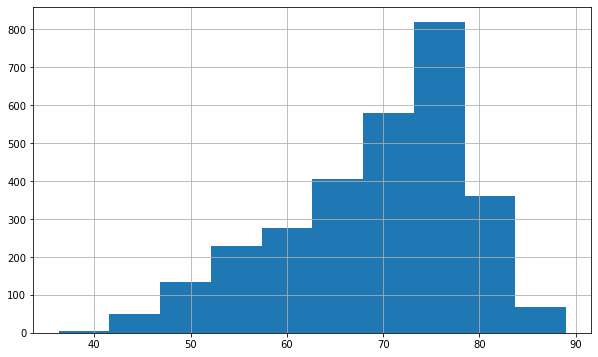

In [10]:
df['life_expectancy'].hist(figsize=(10,6));

In [11]:
df.corr()['life_expectancy'].sort_values(ascending=False)

life_expectancy                    1.000000
schooling                          0.751975
income_composition_of_resources    0.724776
bmi                                0.567694
diphtheria                         0.479495
polio                              0.465556
gdp                                0.461455
alcohol                            0.404877
percentage_expenditure             0.381864
hepatitis_b                        0.256762
total_expenditure                  0.218086
year                               0.170033
population                        -0.021538
measles                           -0.157586
infant_deaths                     -0.196557
under-five_deaths                 -0.222529
thinness_5-9_years                -0.471584
thinness__1-19_years              -0.477183
hiv/aids                          -0.556556
adult_mortality                   -0.696359
Name: life_expectancy, dtype: float64

### Visualizing Relationship between Variables

Looking at the correlations above, we see:
- `schooling` and `life_expectancy` have a correlation coefficient of .752
- `adult_mortality` and `life_expectancy` have a correlation coefficient of -.696

The closer the correlation is to 1, the stronger the positive relationship. The closer it is to -1, the stronger the negative relationship. The closer to 0, the weaker the relationship.

Both variables have a rather strong relationship with `life_expectancy`, only `schooling` is positive (as years of schooling increases, so does life expectancy) and `adult_mortality` is negative (as *adult mortality increases*, life expectancy *decreases*)

These relationships are visualized below.

/Users/mattcarr/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/mattcarr/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


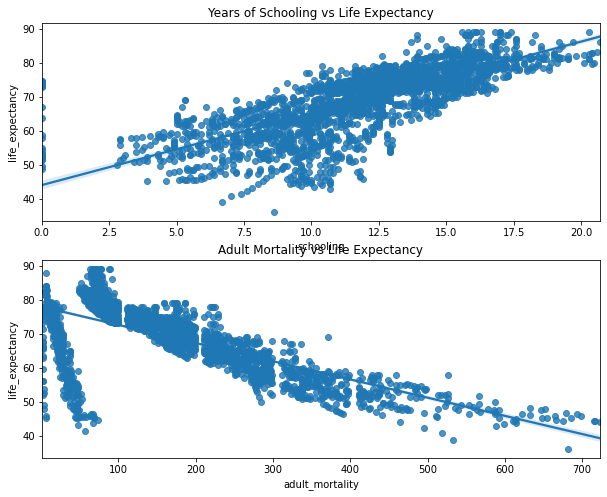

In [12]:
fig, ax = plt.subplots(figsize=(10,8), nrows=2)
sns.regplot(df['schooling'], df['life_expectancy'], ax=ax[0])
sns.regplot(df['adult_mortality'], df['life_expectancy'], ax=ax[1])
ax[0].set_title("Years of Schooling vs Life Expectancy")
ax[1].set_title('Adult Mortality vs Life Expectancy');

Scatterplots are useful for exploring the relationship between two continuous variables. If I wanted to see the relationship between a categorical and continuous, I would want to use a different plot (barplot for example).

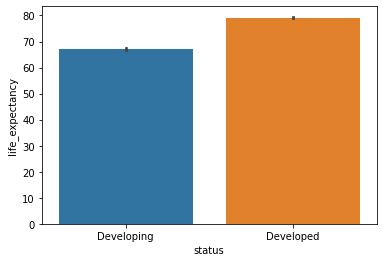

In [13]:
sns.barplot(data=df, x='status', y='life_expectancy');

### Baseline Model

Create baseline model using `schooling` to predict `life_expectancy`

In [14]:
df.isna().sum()

country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 34
under-five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv/aids                             0
gdp                                448
population                         652
thinness__1-19_years                34
thinness_5-9_years                  34
income_composition_of_resources    167
schooling                          163
dtype: int64

Since `life_expectancy` is our target variable, we don't want to fill the missing values. We'll drop them instead.

In [15]:
df = df.dropna(subset=['life_expectancy'])

In [16]:
df.isna().sum()

country                              0
year                                 0
status                               0
life_expectancy                      0
adult_mortality                      0
infant_deaths                        0
alcohol                            193
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 32
under-five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv/aids                             0
gdp                                443
population                         644
thinness__1-19_years                32
thinness_5-9_years                  32
income_composition_of_resources    160
schooling                          160
dtype: int64

`schooling` is missing 160 values that I want to fill before modeling.

In [17]:
df.shape

(2928, 22)

Look at distribution of `schooling` to determine whether I should fill with mean or median

<AxesSubplot:>

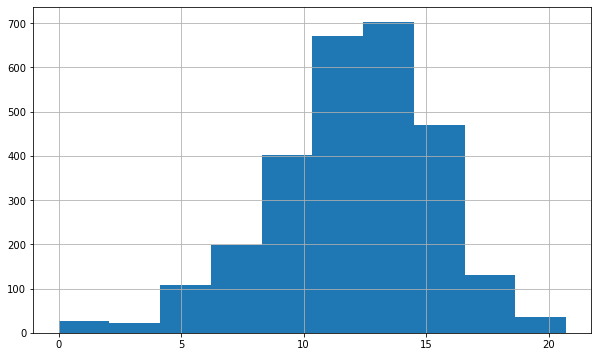

In [18]:
df['schooling'].hist(figsize=(10,6))

The distribution is relatively normal so I will use the mean of `schooling` to fill any missing values.

In [19]:
schooling_mean = df['schooling'].mean()

In [20]:
df['schooling'] = df['schooling'].fillna(schooling_mean)

In [21]:
df.isna().sum()

country                              0
year                                 0
status                               0
life_expectancy                      0
adult_mortality                      0
infant_deaths                        0
alcohol                            193
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 32
under-five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv/aids                             0
gdp                                443
population                         644
thinness__1-19_years                32
thinness_5-9_years                  32
income_composition_of_resources    160
schooling                            0
dtype: int64

To begin modeling, I first need to separate my target (`life_expectancy`) from my feature(s) (`schooling`)

In [22]:
y = df['life_expectancy']
X = df[['schooling']]

Be sure to add a constant to your features when you model!!

In [23]:
baseline_model = sm.OLS(y, sm.add_constant(X)).fit()

In [24]:
baseline_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     3125.
Date:                Tue, 23 Aug 2022   Prob (F-statistic):               0.00
Time:                        12:08:52   Log-Likelihood:                -9689.7
No. Observations:                2928   AIC:                         1.938e+04
Df Residuals:                    2926   BIC:                         1.940e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.9843      0.468     94.013      0.000      43.067      44.902
schooling      2.1035      0.038     55.898      0.000       2.030       2.177
==============================================================================
Omnibus:                      277.635   Durbin-Watson:                   0.245
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              759.000
Skew:                          -0.522   Prob(JB):                    1.53e-165
Kurtosis:                       5.265   Cond. No.                         47.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interpretations:
- `R-squared`: this model explains 51.6% of the variance of my target variable (`life_expectancy`)
    - IMPORTANT: it is the model that explains the variance of your target, not the individual features!
- `schooling` coefficient: for every unit increase in `schooling`, we expect `life_expectancy` to increase by 2.1
- `const` coefficient (intercept): if all features were 0 (a country had 0 years of schooling), we expect the `life_expectancy` to be 43.98

In [25]:
schooling = 8
m = 2.1
b = 43.98

The summary of the model above can be intimidating. But under the hood, the model is nothing more than a simple linear equation. y = mx + b. The slope of the line (`m`) is the coefficient of `schooling`, the y-intercept (`b`) is `const` in the summary above. 

Refer to the scatterplot of `schooling` vs `life_expectancy` above to see this line visually.

In [26]:
life_expectancy = (m * schooling)  + b
life_expectancy

60.78

### Model Iteration

Second model iteration using `schooling` and `income_composition_of_resources`

In [27]:
df.isna().sum()

country                              0
year                                 0
status                               0
life_expectancy                      0
adult_mortality                      0
infant_deaths                        0
alcohol                            193
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 32
under-five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv/aids                             0
gdp                                443
population                         644
thinness__1-19_years                32
thinness_5-9_years                  32
income_composition_of_resources    160
schooling                            0
dtype: int64

`income_composition_of_resources` is also missing values. Explore distribution to determine if I should fill with mean or median.

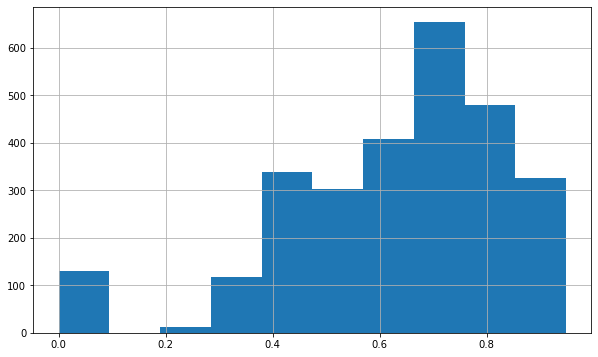

In [28]:
df['income_composition_of_resources'].hist(figsize=(10,6));

Distribution is not very normal, median is a better measure of the center and what we will use to fill the missing values.

In [29]:
income_comp_median = df['income_composition_of_resources'].median()

In [30]:
df['income_composition_of_resources'] = df['income_composition_of_resources'].fillna(income_comp_median)

Once again separate my target from my features.

Personal organization tip: to keep track of which sets of features belong to which models, I like to name my variables a certain way. Below I save my features to the variable `X2` which will be used in my second model (`model2`). For my third model, I would save my features in `X3` and name the model `model3`. Not necessary whatsoever but I think it helps keep track of everything in the notebook!

In [31]:
y = df['life_expectancy']
X2 = df[['schooling','income_composition_of_resources']]

In [32]:
model2 = sm.OLS(y, sm.add_constant(X2)).fit()

In [33]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     1807.
Date:                Tue, 23 Aug 2022   Prob (F-statistic):               0.00
Time:                        12:08:52   Log-Likelihood:                -9575.6
No. Observations:                2928   AIC:                         1.916e+04
Df Residuals:                    2925   BIC:                         1.918e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              43.6193      0.451     96.786      0.000      42.736      44.503
schooling                           1.3633      0.060     22.656      0.000       1.245       1.481
income_composition_of_resources    14.6733      0.953     15.396      0.000      12.805      16.542
==============================================================================
Omnibus:                      276.873   Durbin-Watson:                   0.278
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1059.783
Skew:                          -0.412   Prob(JB):                    7.43e-231
Kurtosis:                       5.830   Cond. No.                         101.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Adding another feature to the model just adds another coefficient (slope). Now, instead of y = mx + b, our model is y = m1schooling + m2income + b

In [34]:
schooling = 9
income_comp = .45
schooling_slope = 1.36
income_comp_slope = 14.6
b = 43.98

y = m1x + m2z + b

In [35]:
life_expectancy = (schooling_slope * schooling) + (income_comp_slope * income_comp) + b
life_expectancy

62.79

Call `.predict()` on model to obtain your model's predictions.

So far we have only used r-sqaured as our metric. Another metric to explore is the root mean squared error (RMSE). The RMSE is the average error of your model. In other words, how far off on average is the model's prediction from the actual value. 

Below we calculate the RMSE by hand (which you do not have to do). Sklearn has a function which will do this calculation for you!

In [36]:
life_expectancy_preds = model2.predict()
life_expectancy_preds

array([64.41753019, 64.23717602, 64.0128021 , ..., 63.51818669,
       63.24551787, 63.34823063])

In [37]:
np.sqrt(((y - life_expectancy_preds) ** 2).mean())

6.368820369259269

On average, our model's predictions are off by about 6.63 years.

In [38]:
from sklearn.metrics import mean_squared_error as mse

The function accepts `y_true` (the actual values) and `y_pred` (model's predictions). By default this function calculates the mean squared error, to get the root mean squared error, set `squared=False`

In [39]:
mse(y, life_expectancy_preds)

40.561872895891774

In [40]:
mse(y, life_expectancy_preds, squared=False)

6.368820369259269

Root mean squared error is typically preferred over mean squared error so your metric is in the same units as your target variable.